In [19]:
import networkx as nx
import matplotlib.pylab as plt
%matplotlib inline
from auditory_cortex.plotters.hierarchical_plotter import Tree, linkage_to_edges

DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.


### color maps

In [2]:
from auditory_cortex.analyses.regression_weights import BetaAnalyzer
from scipy.cluster.hierarchy import dendrogram, linkage
from auditory_cortex.neural_data.config import RecordingConfig
from auditory_cortex.neural_data.recording_sites import NeuralMetaData
import auditory_cortex.utils as utils
import numpy as np
import colorsys

layer = 6
beta_analyzer = BetaAnalyzer('wave2letter_modified')
metadata = NeuralMetaData(RecordingConfig)

corr_cost = lambda x,y: 1- utils.cc_single_channel(x,y)

ordered_sessions_list = metadata.order_sessions_horizontally()

# betas_list, session_labels, ch_labels, area_labels = beta_analyzer.get_sig_betas(
#     ordered_sessions_list, layer=layer
# )

# # linkage_data = linkage(betas_list, method='ward', metric='euclidean')
# linkage_data = linkage(betas_list, method='average', metric=corr_cost, optimal_ordering=True)
# dendrogram_R = dendrogram(linkage_data, no_plot=False)

session_wise_clustering, num_clusters, cluster_wise_ids, linkage_data = beta_analyzer.get_session_wise_clustering(
    ordered_sessions_list, layer=layer, cost_func=corr_cost, opt_ordering=True)

INFO:fairseq.tasks.text_to_speech:Please install tensorboardX: pip install tensorboardX
DEBUG:matplotlib.pyplot:Loaded backend agg version unknown.


Loading file...


In [3]:
cluster_wise_ids.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])

In [4]:
# from auditory_cortex.plotters.regression_weights_plotter import BetaPlotter
# plotter = BetaPlotter('wave2letter_modified')
# out = plotter.get_cluster_wise_colorbar(session_wise_clustering, linkage_data)

In [5]:
edges, root_label = linkage_to_edges(linkage_data=linkage_data)
tree = Tree(edges=edges, root=root_label)
r = (0, 360)
f = 0.95
B_l=-5
L_1=70
B_c=5
C_1=60
tree.assign_HCL(r,f,
    B_l=B_l, L_1=L_1,
    B_c=B_c, C_1=C_1
    )
cluster_based_hls = {}
for cluster, ids in cluster_wise_ids.items(): 
    hues_list = []
    luminance_list = []
    chroma_list = []
    rgb_list = []
    for id in ids:
        hues_list.append(tree.get_node_attribute(id, 'hue'))
        luminance_list.append(tree.get_node_attribute(id, 'luminance'))
        chroma_list.append(tree.get_node_attribute(id, 'chroma'))
        rgb_list.append(tree.get_node_attribute(id, 'rgb_color'))

    cluster_based_hls[cluster] = {'hue': hues_list,
                                    'luminance': luminance_list,
                                    'chroma': chroma_list,
                                    'rgb': rgb_list}

hls_color_list = []
rgb_color_list = []
for cluster, colors in cluster_based_hls.items():
    h = np.mean(colors['hue'])
    l = np.mean(colors['luminance'])
    s = np.mean(colors['chroma'])
    # print(h)
    hls_color_list.append([h,l,s])
    rgb_color_list.append(colorsys.hls_to_rgb(h,l,s))

cmap = PlotterUtils.create_cmap_using_hsl(hls_color_list)

In [38]:
type(cmap)

matplotlib.colors.ListedColormap

In [34]:
import colorsys


In [27]:
from auditory_cortex.plotters.plotter_utils import PlotterUtils
cmap = PlotterUtils.create_cmap_using_hsl(hls_color_list)

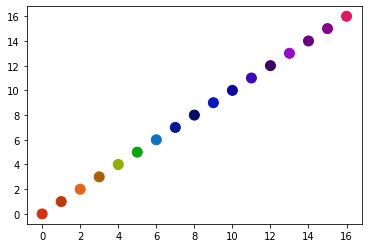

In [36]:
fig, ax = plt.subplots()
x = np.arange(len(rgb_color_list))

ax.scatter(x,x,c=rgb_color_list, s=100)

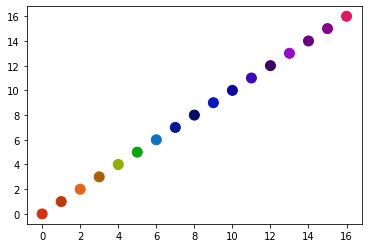

In [37]:
colors = []
for i in range(len(rgb_color_list)):
    colors.append(cmap(i/len(rgb_color_list)))

fig, ax = plt.subplots()
x = np.arange(len(rgb_color_list))

ax.scatter(x,x,c=colors, s=100)

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x2abd83d8c4f0>


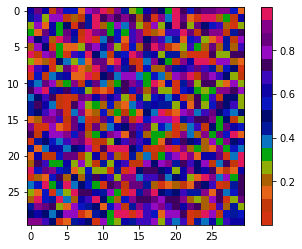

In [25]:

im = np.random.rand(30,30)
mapp = plt.imshow(im, cmap=cmap)
plt.colorbar(mapp)

In [18]:
cmap(0.1)

(0.76, 0.21871530976562503, 0.040000000000000036, 1.0)

In [13]:
import numpy as np
a = [1,2,3,4]
np.mean(a)

2.5

In [10]:
cluster_based_hls

{0: {'hue': [10.540424707031256], 'luminance': [45], 'saturation': [85]},
 1: {'hue': [13.859219509277349, 15.92666545166016],
  'luminance': [40, 40],
  'saturation': [90, 90]},
 2: {'hue': [21.87987890625], 'luminance': [50], 'saturation': [80]},
 3: {'hue': [28.073387079148873,
   28.539854569899,
   29.288657647155773,
   30.140833021531684,
   30.60730051228181,
   31.122869844163525,
   31.589337334913644,
   33.15015700927734,
   34.726584540344234,
   35.475387617601015,
   35.941855108351135,
   37.96083454833985,
   40.028280490722665,
   43.34707529296876],
  'luminance': [30, 30, 35, 30, 30, 30, 30, 40, 35, 30, 30, 40, 40, 45],
  'saturation': [100,
   100,
   95,
   100,
   100,
   100,
   100,
   90,
   95,
   100,
   100,
   90,
   90,
   85]},
 4: {'hue': [51.15292470703125,
   54.47171950927734,
   56.04814704034423,
   57.03018386297607,
   59.28239704833984,
   60.62559083403167,
   61.09205832478179,
   61.84086140203856,
   63.14389641046142,
   64.12593323309326,


In [ ]:
for session, ids in session_wise_clustering.items():
    hues_list = []
    luminance_list = []
    saturation_list = []
    for id in ids:
        hues_list.append(tree.get_node_attribute(id, 'hue'))
        luminance_list.append(tree.get_node_attribute(id, 'luminance'))
        saturation_list.append(tree.get_node_attribute(id, 'chroma'))
    
    cluster_based_hls[session] = {'hue': hues_list,
                                    'luminance': luminance_list,
                                    'saturation': saturation_list}



### rest...

In [7]:
import numpy as np
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from auditory_cortex.plotters.plotter_utils import PlotterUtils

rgb_arr = np.random.rand(100,3)
a = np.ones((10,1))

# np.concatenate([rgb_arr, a], axis=1)
rgba = PlotterUtils.create_cmap_using_rgb(rgb_arr)
my_own = colors.ListedColormap(rgba)

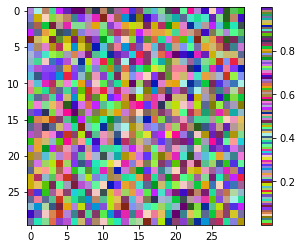

In [8]:

im = np.random.rand(30,30)
mapp = plt.imshow(im, cmap=my_own)
plt.colorbar(mapp)

### Dendrogram

In [2]:
import numpy as np
x_values = np.linspace(5, 7, 5)
y_values = np.linspace(5, 6, 5)
y_values = np.random.permutation(y_values)
cluster1 = np.stack([x_values, y_values], axis=1)

x_values = np.linspace(5, 7, 5)
y_values = np.linspace(-4, -5, 5)
y_values = np.random.permutation(y_values)
cluster2 = np.stack([x_values, y_values], axis=1)

x_values = np.linspace(-4, -2, 5)
y_values = np.linspace(-4, -5, 5)
y_values = np.random.permutation(y_values)
cluster3 = np.stack([x_values, y_values], axis=1)

x_values = np.linspace(0, 1, 5)
y_values = np.linspace(4, 7, 5)
y_values = np.random.permutation(y_values)
cluster4 = np.stack([x_values, y_values], axis=1)

x_values = np.linspace(5, 7, 7)
y_values = np.linspace(-1, 1, 7)
y_values = np.random.permutation(y_values)
cluster5 = np.stack([x_values, y_values], axis=1)

clusters = np.concatenate([cluster1, cluster2, cluster3, cluster4, cluster5], axis=0)
# clusters = np.random.permutation(clusters)

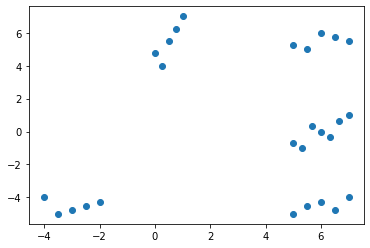

In [3]:
plt.scatter(clusters[:,0], clusters[:,1])

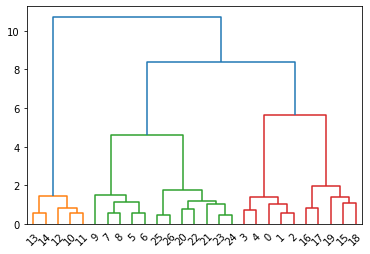

In [3]:
from scipy.cluster.hierarchy import linkage, dendrogram

linkage_data = linkage(clusters, method='average', metric='euclidean')
R = dendrogram(linkage_data, no_plot=False)

In [7]:
# edges = []
# num_nodes = clusters.shape[0]
# print(num_nodes)

# max_leaf_label = num_nodes - 1
# root_label = max_leaf_label + linkage_data.shape[0]

# for i, arr in enumerate(linkage_data):
#     parent = num_nodes + i 
#     child1 = int(arr[0])
#     child2 = int(arr[1])
#     edges.append((parent, child1))
#     edges.append((parent, child2))

edges, root_label = linkage_to_edges(linkage_data=linkage_data)
    # break

27


In [11]:
tree = Tree(edges=edges, root=root_label)
r = (0, 360)
f = 0.95
B_l=-5
L_1=70
B_c=5
C_1=60
tree.assign_HCL(r,f,
    B_l=B_l, L_1=L_1,
    B_c=B_c, C_1=C_1
    )

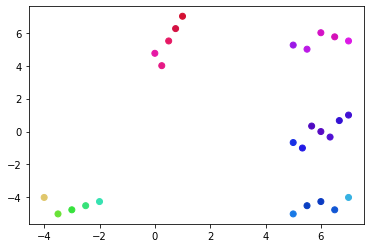

In [12]:
colors = []
num_leaf_nodes = linkage_data.shape[0] + 1
leaf_node_labels = np.arange(num_leaf_nodes)
for node_label in leaf_node_labels:
    color = tree.get_node(node_label).get_attribute('rgb_color')
    if color:
        colors.append(color)
    else:
        print(f"You might want to run 'assign_HCL()")
plt.scatter(clusters[:,0], clusters[:,1], c=colors)

In [13]:
tree.get_tree_depth()

7

### Hierarchical cluster

In [2]:
edges = [(0,'A'), (0,'C'), (0,'B'),
          ('A', 'A1'), ('A', 'A2'), ('A', 'A3'), ('A', 'A4'),
          ('B', 'B1'), ('B', 'B2'), ('B', 'B3'),
          ('C', 'C1'), ('C', 'C2'), ('C', 'C3'), ('C', 'C4'), ('C', 'C5')
        ]

tree = Tree(edges=edges, root=0)


In [3]:
len(tree.nodes)

16

In [20]:
tree.nodes.keys()

dict_keys([20, 0, 1, 21, 3, 4, 22, 5, 6, 23, 7, 8, 24, 13, 14, 25, 11, 12, 26, 18, 19, 27, 16, 17, 28, 2, 29, 9, 30, 10, 31, 15, 32, 33, 34, 35, 36, 37, 38])

In [4]:
r = (0, 360)
f = 0.75
tree.assign_HCL(r,f)
# tree.assign_hue(r,f)

At leaf node: A1
At leaf node: A2
At leaf node: A3
At leaf node: A4
At leaf node: C1
At leaf node: C2
At leaf node: C3
At leaf node: C4
At leaf node: C5
At leaf node: B1
At leaf node: B2
At leaf node: B3


In [5]:
tree.nodes['A'].get_attribute('hls_color')

(0.16666666666666666, 0.7, 0.6)

In [6]:
colors = []
labels = list(tree.nodes.keys())
x_coord = []
y_coord = []
i = 1
for label in labels:
    x_coord.append(i)
    y_coord.append(1)
    i += 1
    colors.append(tree.get_node(label).get_attribute('rgb_color'))

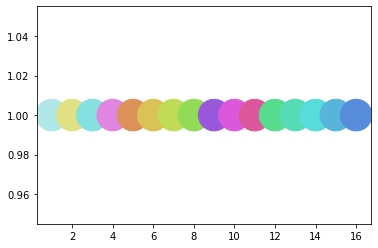

In [7]:
plt.scatter(x_coord, y_coord, c=colors, s=1000)

In [20]:
import numpy as np
np.array(labels)

array(['0', 'A', 'C', 'B', 'A1', 'A2', 'A3', 'A4', 'B1', 'B2', 'B3', 'C1',
       'C2', 'C3', 'C4', 'C5'], dtype='<U21')

In [6]:
tree.nodes[0].set_color_values()

Setting color values...


In [11]:
len(tree.nodes)

8

In [12]:
tree.nodes.keys()

dict_keys([0, 'A', 'C', 'B', 'A1', 'A2', 'A3', 'A4'])

In [20]:
tree.parse_tree(attr='depth')

Node: 0, depth: 0
Node: A, depth: 1
Node: A1, depth: 2
Node: A2, depth: 2
Node: A3, depth: 2
Node: A4, depth: 2
Node: C, depth: 1
Node: B, depth: 1


In [21]:
tree.parse_tree(attr='hue')

Node: 0, hue: 180.0
Node: A, hue: 60.0
Node: A1, hue: 26.25
Node: A2, hue: 48.75
Node: A3, hue: 71.25
Node: A4, hue: 93.75
Node: C, hue: 180.0
Node: B, hue: 300.0


In [22]:
tree.parse_tree(attr='chroma')

Node: 0, chroma: 80
Node: A, chroma: 75
Node: A1, chroma: 70
Node: A2, chroma: 70
Node: A3, chroma: 70
Node: A4, chroma: 70
Node: C, chroma: 75
Node: B, chroma: 75


In [23]:
tree.parse_tree(attr='luminance')

Node: 0, luminance: 80
Node: A, luminance: 70
Node: A1, luminance: 60
Node: A2, luminance: 60
Node: A3, luminance: 60
Node: A4, luminance: 60
Node: C, luminance: 70
Node: B, luminance: 70


In [6]:
tree.get_node(1).get_num_children()

AttributeError: 'int' object has no attribute 'get_num_children'

In [5]:
tree.get_node(1).get_num_children()

2

In [12]:
a = 12
b = False
c = True
if a and b and c:
    print("amazing")

In [5]:
tree.get_node(tree.root_label).

In [14]:
import colorsys
hls_color = (60, 60,60)
rgb_color = colorsys.hls_to_rgb(*hls_color)

In [5]:
tree_structure.keys()[0]

TypeError: 'dict_keys' object is not subscriptable

In [7]:
tree.get_node(2).attributes

{'name': 2}

In [9]:
tree.get_node(0).get_num_children()

2

In [2]:
DG = nx.DiGraph()
DG.add_edges_from([(0,1), (0,2), (1,3), (1,4), (2,5)])

In [3]:
list(DG.successors(1))

[3, 4]

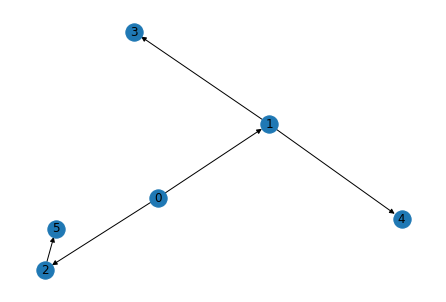

In [4]:
nx.draw(DG, with_labels=True)
# plt.draw()

In [5]:
import igraph as ig
g = ig.Graph(n = 6)
g.add_edges([(0,1), (0,2), (1,3), (1,4),(2,5)])

<AxesSubplot:>

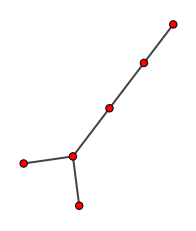

In [6]:
fig, ax = plt.subplots()
layout = g.layout('fr')
ig.plot(g, layout=layout, target=ax)

In [1]:
from matplotlib import colors
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [26]:
hue = np.arange(0,360,10)/360.0
# sat = np.arange(25,100, 25)/100.0
# lumin = np.arange(25,100, 25)/100.0

sat = np.ones_like(hue)*0.75
lumin = np.ones_like(hue)*0.9

In [28]:
hsv = np.stack([hue, sat, lumin], axis=1)

In [50]:
rgb = colors.hsv_to_rgb(hsv=hsv)
rgba = np.concatenate([rgb, np.ones((rgb.shape[0],1))], axis=1)

In [51]:
my_own = colors.ListedColormap(rgba)

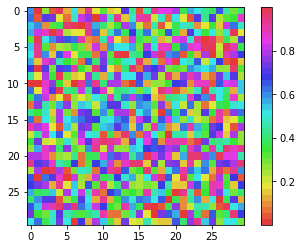

In [53]:

data = np.random.rand(30,30)
fig, ax = plt.subplots()
image = ax.imshow(data, cmap=my_own)
fig.colorbar(image, ax=ax)

In [45]:
rgb.shape

(36, 5)

In [14]:
# def AssignHue(r, f=0.75):

n_children = 3
r = (0,360)
f = 0.75
r_list = []

# set value of hue for current node...
# v.set_hue((r[0]+r[1])/2)
hue_range = r[1] - r[0]
centers_gap = hue_range/n_children

for i in range(n_children):
    r_list.append((i*centers_gap, (i+1)*centers_gap))

reduced_r_list = []
for rs,re in r_list:
    retained_gap = (re - rs)*f
    strt = rs + (re - rs)*(1-f)/2
    reduced_r_list.append((strt, strt+retained_gap))



In [15]:
r_list

[(0.0, 120.0), (120.0, 240.0), (240.0, 360.0)]

In [16]:
reduced_r_list

[(15.0, 105.0), (135.0, 225.0), (255.0, 345.0)]

In [9]:
retained_gap_length = f*centers_gap
removed_gap = centers_gap - retained_gap_length
for i in range(n_children):
    strt = i*centers_gap + removed_gap/2
    ri.append((strt, strt+retained_gap_length))




[(15.0, 105.0), (135.0, 225.0), (255.0, 345.0)]

In [40]:
np.ones((rgb.shape[0],1)).shape

(36, 1)

In [32]:
colors.hsv_to_rgba(hsv)

AttributeError: module 'matplotlib.colors' has no attribute 'hsv_to_rgba'

In [ ]:
hue = 100/360.0
sat = 80/100.0
lumin = 50/100.0

colors.hsv_to_rgb()
